#1).Problem Statement

"The objective of this data science project is to develop a predictive model that accurately forecasts the sales of 1559 products across 10 stores in various cities based on the collected sales data from the year 2013. The dataset includes specific attributes for each product and store. The predictive model aims to provide insights into the sales patterns, helping BigMart optimize inventory management and sales strategies. By leveraging machine learning algorithms, we seek to understand the factors influencing product sales and store performance. The ultimate goal is to enhance decision-making processes, enabling BigMart to make informed decisions about product stocking, marketing strategies, and overall store management."







#2).Hypothesis Generation

#Store Size and Sales:

Hypothesis: Larger stores tend to have higher sales due to a wider variety of products and a larger customer base.
#Location Impact on Sales:

Hypothesis: Stores located in urban areas may have higher sales compared to those in rural areas, as urban areas generally have a higher population density and more foot traffic.
#Product Visibility:

Hypothesis: Products placed at eye level or in high-traffic areas within a store may have higher sales, as they are more visible to customers.
#Product Type Influence:

Hypothesis: Certain product categories may have higher sales compared to others, depending on consumer preferences and demand trends.
#Store Performance Over Time:

Hypothesis: Stores may experience seasonal variations in sales, with higher sales during certain months or seasons (e.g., festivals, holidays).
#Promotional Activities:

Hypothesis: Products that are part of promotional campaigns or discounted sales may experience a temporary boost in sales.
#Product Packaging Impact:

Hypothesis: Attractive or innovative product packaging may positively influence sales by attracting more customers.
#Store Reputation:

Hypothesis: Stores with a good reputation or customer ratings may attract more customers and have higher sales.
#Demographic Factors:

Hypothesis: The demographic profile of the area surrounding a store may impact sales, with certain products being more popular among specific demographics.
#Product Shelf Life:

Hypothesis: Products with a longer shelf life may have more stable and consistent sales compared to products with a shorter shelf life.


#3).Loading Packages and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
train_df = pd.read_csv('Train.csv')
test_df=pd.read_csv('Test.csv')


#4).Data Structure and Content
#5).Exploratory Data Analysis

In [4]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
#Basic information about the dataset
train_df.info()
#test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#summary statistics of numerical columns
train_df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
#test_df.describe()

In [9]:
# Checking for missing values in Training data
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# Checking for missing values in Testing data
#test_df.isnull().sum()

Finding all Categorical Columns in the Dataset

In [11]:
def get_categorical_columns(train_df):

    train_categorical_columns = train_df.select_dtypes(include=['object']).columns

    return train_categorical_columns
categorical_columns = get_categorical_columns(train_df)
categorical_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

Checking Unique values in all Categorical Columns

In [12]:
for i in categorical_columns:
    unique_values = train_df[i].unique()
    print(f'Unique values in {i}:')
    print(unique_values)
    print()

Unique values in Item_Identifier:
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Unique values in Item_Fat_Content:
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Unique values in Item_Type:
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Unique values in Outlet_Identifier:
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Unique values in Outlet_Size:
['Medium' nan 'High' 'Small']

Unique values in Outlet_Location_Type:
['Tier 1' 'Tier 3' 'Tier 2']

Unique values in Outlet_Type:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



In [13]:
train_df =  train_df.replace(to_replace ="low fat",  value ="Low Fat")
train_df =  train_df.replace(to_replace ="LF",  value ="Low Fat")
train_df =  train_df.replace(to_replace ="reg",  value ="Regular")

In [14]:
test_df =  test_df.replace(to_replace ="low fat",  value ="Low Fat")
test_df =  test_df.replace(to_replace ="LF",  value ="Low Fat")
test_df =  test_df.replace(to_replace ="reg",  value ="Regular")

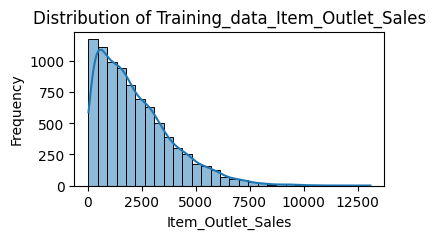

In [15]:
# Visualize the distribution of the target variable (Item_Outlet_Sales)
plt.figure(figsize=(4, 2))
sns.histplot(train_df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Training_data_Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.show()


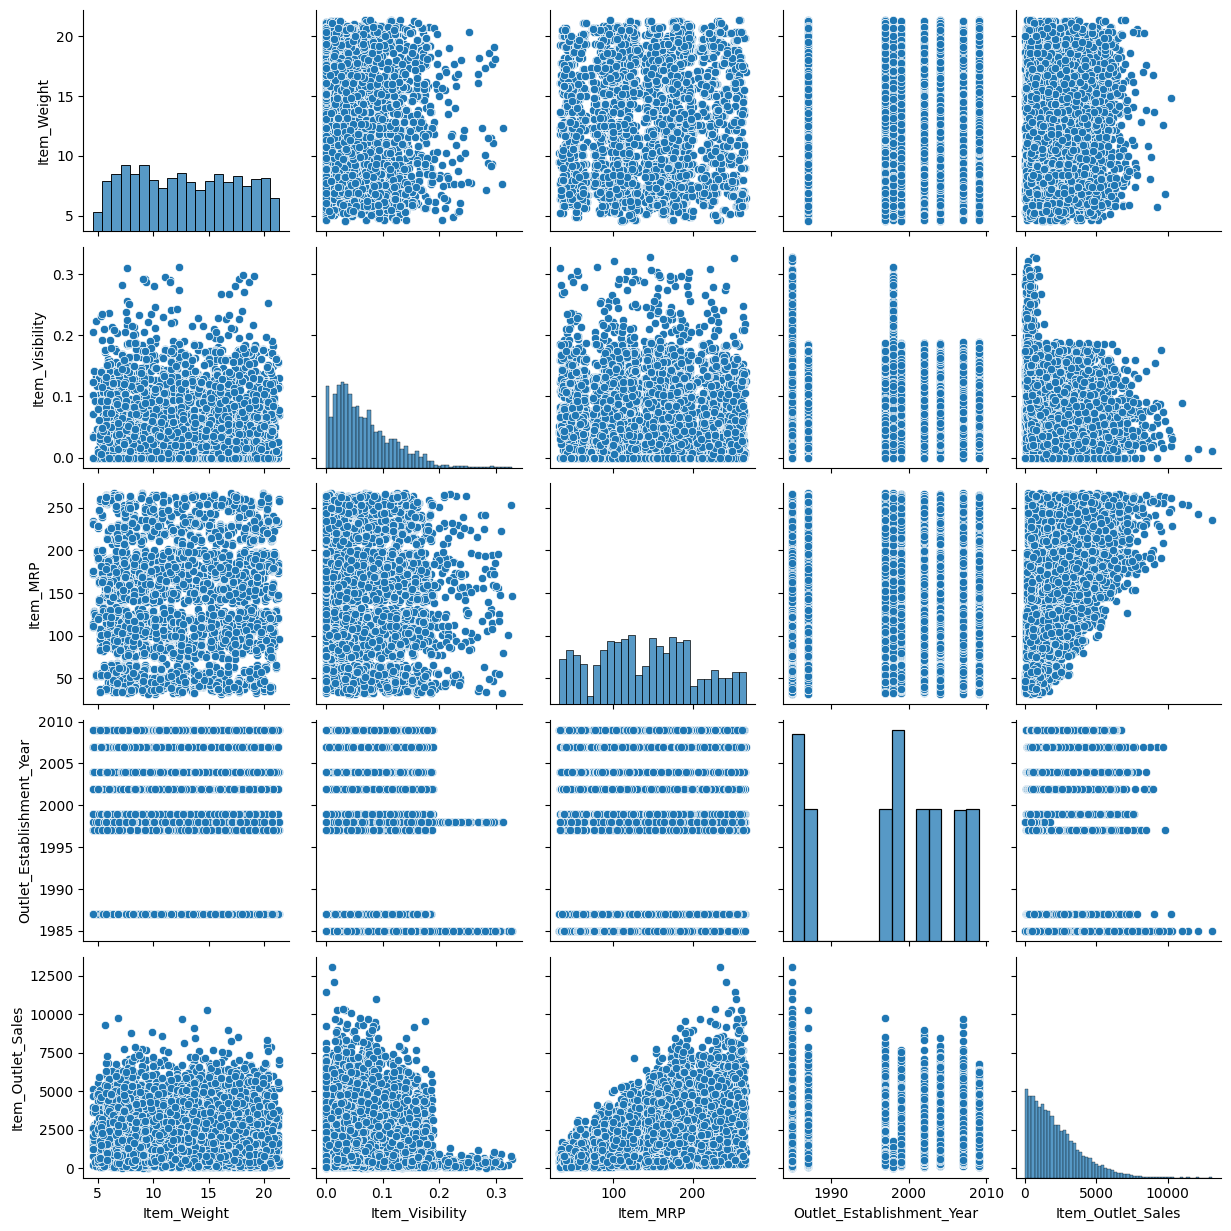

In [16]:
# Visualize distribution of numerical columns
sns.pairplot(train_df)
plt.show()

<ipython-input-17-5f656750806e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True)


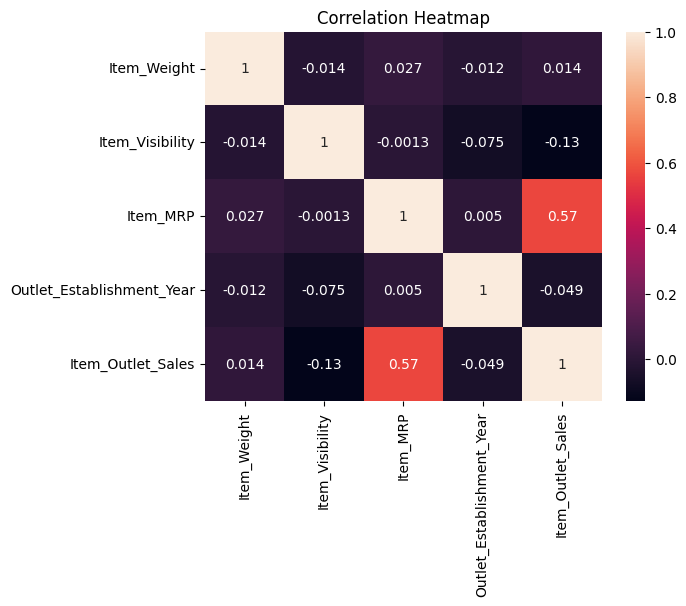

In [17]:
# Visualize relationships between variables
sns.heatmap(train_df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

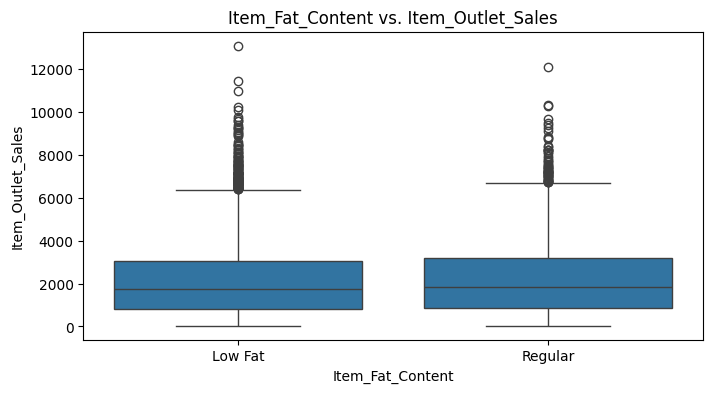

In [18]:
# Box plots for categorical variables vs. Item_Outlet_Sales
plt.figure(figsize=(8, 4))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train_df)
plt.title('Item_Fat_Content vs. Item_Outlet_Sales')
plt.show()


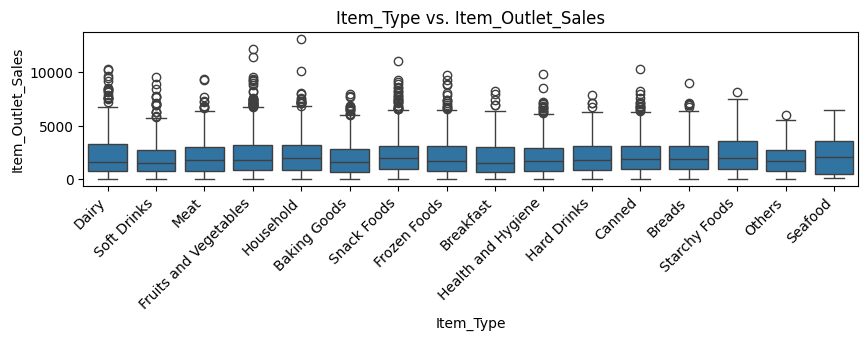

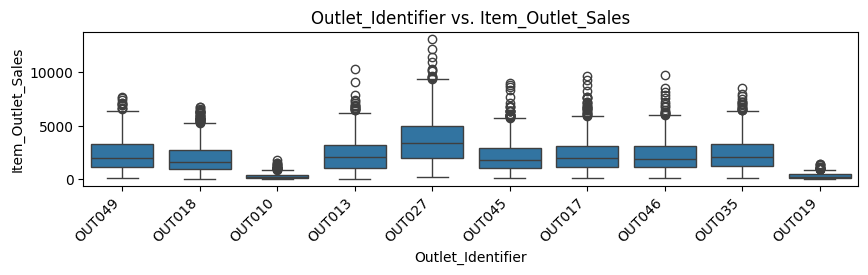

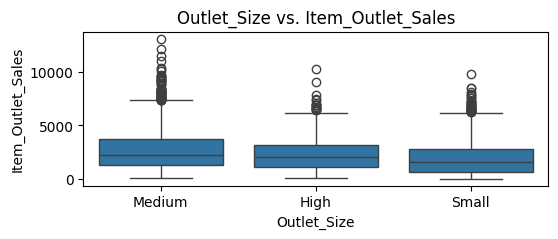

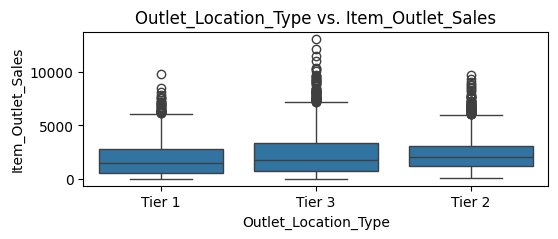

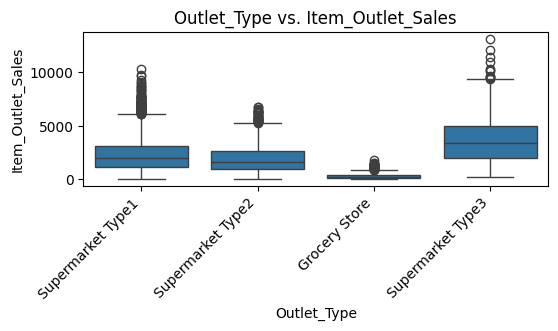

In [19]:
# Box plots for other categorical variables vs. Item_Outlet_Sales

# Item_Type
plt.figure(figsize=(10, 2))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train_df)
plt.title('Item_Type vs. Item_Outlet_Sales')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()

# Outlet_Identifier
plt.figure(figsize=(10, 2))
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train_df)
plt.title('Outlet_Identifier vs. Item_Outlet_Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

# Outlet_Size
plt.figure(figsize=(6, 2))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train_df)
plt.title('Outlet_Size vs. Item_Outlet_Sales')
plt.show()

# Outlet_Location_Type
plt.figure(figsize=(6, 2))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_df)
plt.title('Outlet_Location_Type vs. Item_Outlet_Sales')
plt.show()

# Outlet_Type
plt.figure(figsize=(6, 2))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_df)
plt.title('Outlet_Type vs. Item_Outlet_Sales')
plt.xticks(rotation=45, ha='right')
plt.show()


#6). Univariate Analysis:
Numerical Variables:

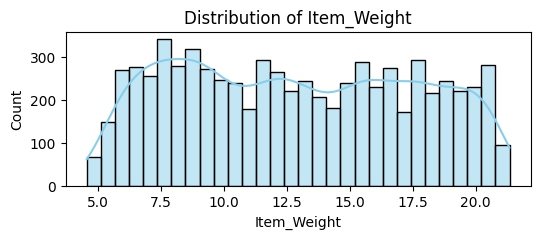

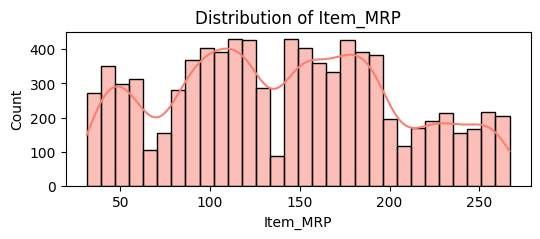

In [20]:
# Histograms for numerical variables
plt.figure(figsize=(6, 2))
sns.histplot(train_df['Item_Weight'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Item_Weight')
plt.show()

plt.figure(figsize=(6, 2))
sns.histplot(train_df['Item_MRP'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Item_MRP')
plt.show()

Categorical Variables:

<ipython-input-21-bb058d2259c4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df['Item_Fat_Content'], palette='pastel')


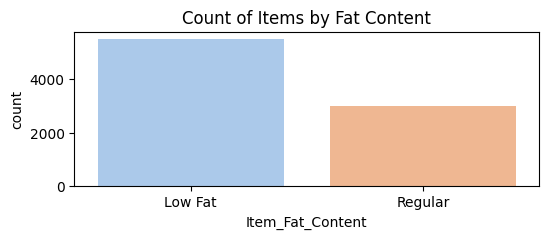

<ipython-input-21-bb058d2259c4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df['Item_Type'], palette='pastel')


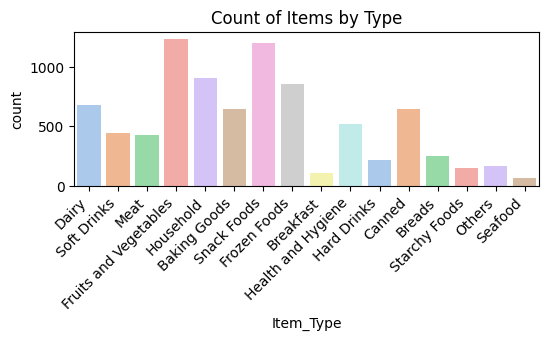

<ipython-input-21-bb058d2259c4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df['Outlet_Size'], palette='pastel')


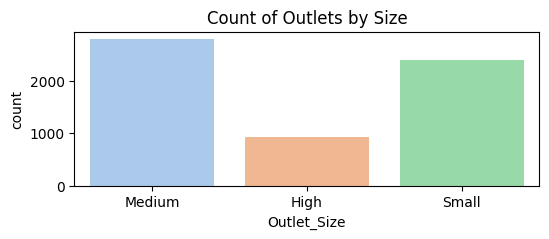

In [21]:

# Count plots for categorical variables
plt.figure(figsize=(6, 2))
sns.countplot(x=train_df['Item_Fat_Content'], palette='pastel')
plt.title('Count of Items by Fat Content')
plt.show()

plt.figure(figsize=(6, 2))
sns.countplot(x=train_df['Item_Type'], palette='pastel')
plt.title('Count of Items by Type')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(6, 2))
sns.countplot(x=train_df['Outlet_Size'], palette='pastel')
plt.title('Count of Outlets by Size')
plt.show()


#7). Bivariate Analysis:


Numerical vs. Numerical Variables:

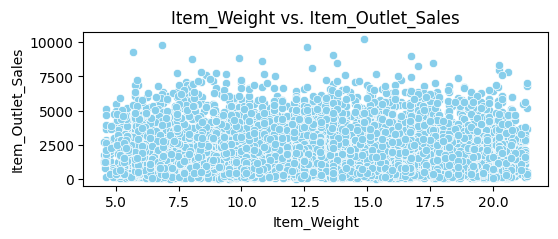

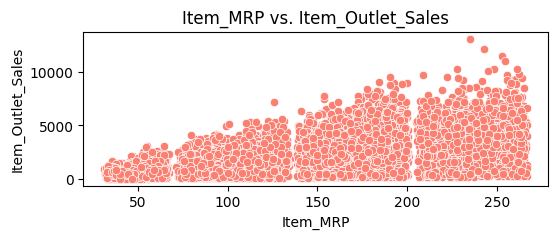

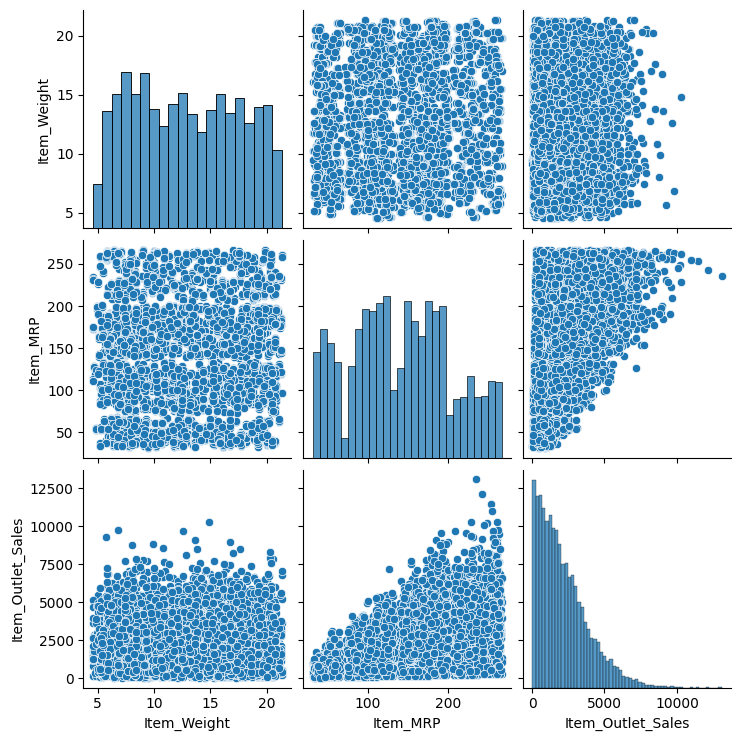

In [22]:
# Scatter plots for numerical variables
plt.figure(figsize=(6, 2))
sns.scatterplot(x=train_df['Item_Weight'], y=train_df['Item_Outlet_Sales'], color='skyblue')
plt.title('Item_Weight vs. Item_Outlet_Sales')
plt.show()

plt.figure(figsize=(6, 2))
sns.scatterplot(x=train_df['Item_MRP'], y=train_df['Item_Outlet_Sales'], color='salmon')
plt.title('Item_MRP vs. Item_Outlet_Sales')
plt.show()

# Pairplot for selected numerical variables
numerical_features = ['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales']
sns.pairplot(train_df[numerical_features])
plt.show()


Numerical vs. Categorical Variables:

<ipython-input-23-6b8fe903d4ab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_df['Item_Fat_Content'], y=train_df['Item_Outlet_Sales'], palette='pastel')


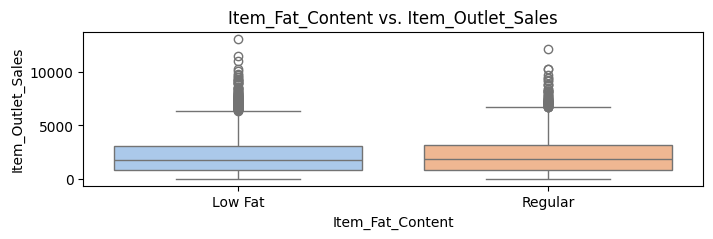

<ipython-input-23-6b8fe903d4ab>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_df['Item_Type'], y=train_df['Item_Outlet_Sales'], palette='pastel')


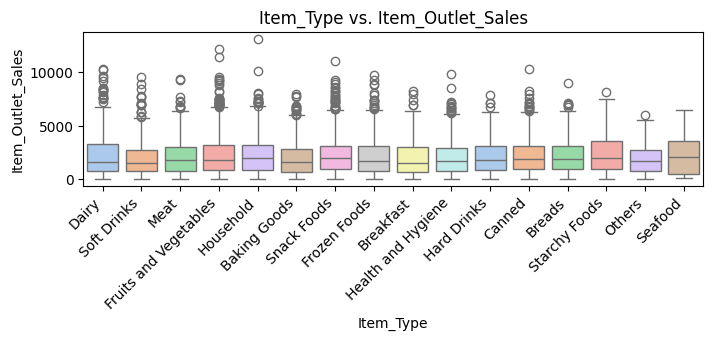

<ipython-input-23-6b8fe903d4ab>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_df['Outlet_Size'], y=train_df['Item_Outlet_Sales'], palette='pastel')


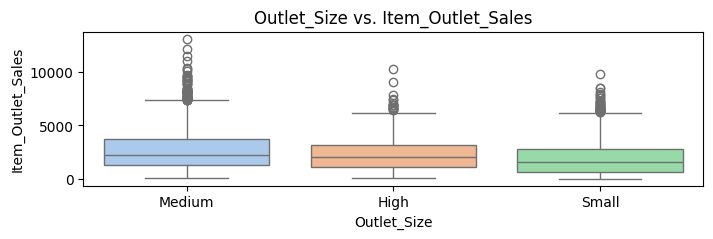

In [23]:
# Box plots for numerical vs. categorical variables
plt.figure(figsize=(8, 2))
sns.boxplot(x=train_df['Item_Fat_Content'], y=train_df['Item_Outlet_Sales'], palette='pastel')
plt.title('Item_Fat_Content vs. Item_Outlet_Sales')
plt.show()

plt.figure(figsize=(8, 2))
sns.boxplot(x=train_df['Item_Type'], y=train_df['Item_Outlet_Sales'], palette='pastel')
plt.title('Item_Type vs. Item_Outlet_Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(8, 2))
sns.boxplot(x=train_df['Outlet_Size'], y=train_df['Item_Outlet_Sales'], palette='pastel')
plt.title('Outlet_Size vs. Item_Outlet_Sales')
plt.show()


#8).Missing Values Treatment

Mode Imputation

In [24]:
def impute_mode_for_columns(train_df, test_df, columns_to_impute):
    # Get columns with null values in the train and test datasets
    train_columns_with_null = train_df.columns[train_df.isnull().any()]
    test_columns_with_null = test_df.columns[test_df.isnull().any()]

    # Combine columns with null values from both datasets
    all_columns_with_null = set(train_columns_with_null).union(test_columns_with_null)

    # Loop through specified columns for imputation
    for column in columns_to_impute:
        # Check if the column has missing values
        if column in all_columns_with_null:
            # Perform mode imputation on both train and test data
            mode_value_train = train_df[column].mode()[0]
            mode_value_test = test_df[column].mode()[0]

            train_df[column].fillna(mode_value_train, inplace=True)
            test_df[column].fillna(mode_value_test, inplace=True)

    return train_df, test_df

columns_to_impute = train_df.columns[train_df.isnull().any()]
train_df, test_df = impute_mode_for_columns(train_df, test_df, columns_to_impute)


In [25]:
#train_df['Item_Weight'].fillna(train_df['Item_Weight'].mode()[0], inplace=True)
#train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0], inplace=True)

In [26]:

train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Feature Engineering:
Numerical Feature Engineering:
Log Transformation:
Apply log transformation to reduce the impact of extreme values.

In [27]:

# Log transformation for a numerical feature
#train_df['Log_Item_MRP'] = np.log1p(train_df['Item_MRP'])
#df['Log_Item_MRP']

Interaction Terms:
Create new features by combining existing ones.

In [28]:
# Interaction term between two numerical features
#train_df['Item_Weight_MRP_Interact'] = train_df['Item_Weight'] * train_df['Item_MRP']


Domain-Specific Features:
Introduce features based on domain knowledge.

In [29]:
# Create a feature indicating whether a product is a high-priced item
#train_df['High_Priced_Item'] = np.where(train_df['Item_MRP'] > train_df['Item_MRP'].mean(), 1, 0)


Time-Based Feature Engineering:
Extracting Time Features:
Extract components like year, month, day from a timestamp.

In [30]:
# Extracting time features from a timestamp

#train_df['Month_Established'] = pd.to_datetime(train_df['Outlet_Establishment_Year'], format='%Y').dt.month


#10).Encoding Categorical Variables
#11).Label Encoding
#12).One Hot Encoding
#13).PreProcessing Data

If  have a categorical column with a large number of unique values, such as an item identifier column, traditional one-hot encoding might lead to a large number of new columns, making your dataset very wide and potentially leading to computational issues. In such cases, you might want to consider alternative encoding methods. Here are two commonly used approaches:

In [31]:
test_data=test_df
test_data = test_df[["Item_Identifier", "Outlet_Identifier"]].copy()


In [32]:

from sklearn.preprocessing import OneHotEncoder

def encode_categorical_columns(train_df, test_df):
    # Identify the column with the maximum number of unique values for count encoding
    max_unique_column_train = train_df.select_dtypes(include=['object']).nunique().idxmax()
    max_unique_column_test = test_df.select_dtypes(include=['object']).nunique().idxmax()

    # Perform count encoding for the column with the maximum number of unique values
    count_encoding_train = train_df[max_unique_column_train].value_counts().to_dict()
    count_encoding_test = test_df[max_unique_column_test].value_counts().to_dict()

    train_df[f'{max_unique_column_train}_Count_Encoded'] = train_df[max_unique_column_train].map(count_encoding_train)
    test_df[f'{max_unique_column_test}_Count_Encoded'] = test_df[max_unique_column_test].map(count_encoding_test)

    # Drop the original column used for count encoding
    train_df.drop(max_unique_column_train, axis=1, inplace=True)
    test_df.drop(max_unique_column_test, axis=1, inplace=True)

    # Perform one-hot encoding for the remaining categorical columns
    remaining_columns_train = train_df.select_dtypes(include=['object']).columns
    remaining_columns_test = test_df.select_dtypes(include=['object']).columns

    for column in remaining_columns_train:
        enc = OneHotEncoder()
        enc_data_train = pd.DataFrame(enc.fit_transform(train_df[[column]]).toarray(), columns=enc.get_feature_names_out([column]))
        train_df = pd.concat([train_df, enc_data_train], axis=1)
        train_df.drop(column, axis=1, inplace=True)

    for column in remaining_columns_test:
        enc = OneHotEncoder()
        enc_data_test = pd.DataFrame(enc.fit_transform(test_df[[column]]).toarray(), columns=enc.get_feature_names_out([column]))
        test_df = pd.concat([test_df, enc_data_test], axis=1)
        test_df.drop(column, axis=1, inplace=True)

    return train_df, test_df

train_df, test_df = encode_categorical_columns(train_df.copy(), test_df.copy())


In [33]:
train_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_Count_Encoded,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,8,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.920,0.019278,48.2692,2009,443.4228,6,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.500,0.016760,141.6180,1999,2097.2700,7,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.200,0.000000,182.0950,1998,732.3800,6,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,8.930,0.000000,53.8614,1987,994.7052,6,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,8,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8519,8.380,0.046982,108.1570,2002,549.2850,6,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8520,10.600,0.035186,85.1224,2004,1193.1136,6,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8521,7.210,0.145221,103.1332,2009,1845.5976,6,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# 14). Modeling

Split the training data into features and target variable

In [34]:

X_train = train_df.drop('Item_Outlet_Sales', axis=1)
y_train = train_df['Item_Outlet_Sales']

In [35]:
X_test = test_df

In [36]:
X_train.shape, X_test.shape

((8523, 43), (5681, 43))

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# 15). Linear Regression

In [39]:

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_predictions

array([1841.21273181, 1532.91585681, 1870.08773181, ..., 1805.22835681,
       3583.32210681, 1276.66585681])

#16).Regularized Linear Regression

In [40]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_predictions


array([1841.18819721, 1533.024561  , 1870.46815329, ..., 1805.51710393,
       3583.16449026, 1276.8598023 ])

In [41]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can adjust the regularization strength (alpha)
lasso_model.fit(X_train, y_train)

lasso_predictions = lasso_model.predict(X_test)
lasso_predictions

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.146e+07, tolerance: 2.482e+06
  model = cd_fast.enet_coordinate_descent(


array([1841.64213931, 1532.30509074, 1879.97928874, ..., 1814.43471778,
       3575.34592019, 1278.79384558])

#17).RandomForest

In [42]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_predictions

array([1690.539438, 1282.9966  ,  706.320588, ..., 1912.969902,
       4286.88646 , 1481.511528])

# 19). XGBoost

In [43]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)
xgb_predictions

array([1524.7854, 1441.658 ,  621.1147, ..., 2423.9155, 4311.9653,
       1324.3857], dtype=float32)

In [44]:
test_df['Predicted_Sales'] = linear_predictions

In [45]:
a=pd.DataFrame(test_df["Predicted_Sales"].copy())
final_data=pd.concat([test_data,a], axis=1)

In [46]:
final_data

,Item_Identifier,Outlet_Identifier,Predicted_Sales
0,FDW58,OUT049,1841.212732
1,FDW14,OUT017,1532.915857
2,NCN55,OUT010,1870.087732
3,FDQ58,OUT017,2568.009607
4,FDY38,OUT027,5128.478357
...,...,...,...
5676,FDB58,OUT046,2290.540857
5677,FDD47,OUT018,2447.915857
5678,NCO17,OUT045,1805.228357
5679,FDJ26,OUT017,3583.322107


In [47]:
result_df = final_data.groupby('Outlet_Identifier').agg({'Item_Identifier': list, 'Predicted_Sales': list}).reset_index()


In [48]:
outlet_dataframes = {outlet_id: pd.DataFrame({'Items_ID': items, 'Predicted_Outlet_Sales': sales}) for outlet_id, items, sales in zip(result_df['Outlet_Identifier'], result_df['Item_Identifier'], result_df['Predicted_Sales'])}
for outlet_id, outlet_df in outlet_dataframes.items():
    print(f"DataFrame for Outlet {outlet_id}:")
    print(outlet_df[['Items_ID', 'Predicted_Outlet_Sales']])
    print("\n")


DataFrame for Outlet OUT010:
    Items_ID  Predicted_Outlet_Sales
0      NCN55             1870.087732
1      FDA46             1098.712732
2      FDX22             1452.337732
3      FDD48              -63.412268
4      FDY19              -14.287268
..       ...                     ...
365    FDI15             2173.212732
366    NCH43             1459.837732
367    FDA23             -307.912268
368    FDC10               22.712732
369    FDC44             -112.662268

[370 rows x 2 columns]


DataFrame for Outlet OUT013:
    Items_ID  Predicted_Outlet_Sales
0      DRL59              915.118982
1      FDA31             2827.243982
2      FDC26             1834.181482
3      FDM03             1717.993982
4      FDA09             2925.087732
..       ...                     ...
616    FDM12             3055.087732
617    FDD23             3054.556482
618    FDQ57             2346.556482
619    FDL45             1996.868982
620    FDK22             3429.368982

[621 rows x 2 columns]


Da

In [58]:
final_Output= pd.concat(outlet_dataframes.values(), keys=outlet_dataframes.keys(), names=['Outlet_ID'])
final_Output

Items_ID  Predicted_Outlet_Sales
Outlet_ID                                     
OUT010    0      NCN55             1870.087732
          1      FDA46             1098.712732
          2      FDX22             1452.337732
          3      FDD48              -63.412268
          4      FDY19              -14.287268
...                ...                     ...
OUT049    615    FDJ58             2835.837732
          616    DRK37             3072.775232
          617    FDA01             1132.087732
          618    NCH42             3721.087732
          619    FDW46             1156.087732

[5681 rows x 2 columns]

In [ ]:
final_Output.to_csv('final_output.csv')

In [ ]:
# Create separate DataFrames for each outlet ID
outlet_dataframes = {outlet_id: pd.DataFrame({'Item': items, 'Sales': sales}) for outlet_id, items, sales in zip(result_df['Outlet_Identifier'], result_df['Item_Identifier'], result_df['Predicted_Sales'])}

# Function to get DataFrame for a given outlet ID
def get_dataframe_for_outlet(outlet_id):
    return outlet_dataframes.get(outlet_id)

outlet_id_input = input("Enter Outlet ID: ")
output_df = get_dataframe_for_outlet(outlet_id_input)

if output_df is not None:
    print(f"DataFrame for Outlet {outlet_id_input}:\n{output_df}")
else:
    print(f"No DataFrame found for Outlet {outlet_id_input}")

Enter Outlet ID: OUT049
DataFrame for Outlet OUT049:
      Item        Sales
0    FDW58  1841.212732
1    FDU11  2050.275232
2    FDM24  2546.400232
3    FDG02  3129.775232
4    NCX06  2927.650232
..     ...          ...
615  FDJ58  2835.837732
616  DRK37  3072.775232
617  FDA01  1132.087732
618  NCH42  3721.087732
619  FDW46  1156.087732

[620 rows x 2 columns]
